In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
# Laden der p01_done.npy Daten und der Metadaten
data_array = np.load('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p01_done.npy') 
meta_data = pd.read_excel('/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/sensor_meta_feature.xlsx', header= 1)

In [10]:
null_count = meta_data.isnull().sum()
print(null_count)

Fwy                        0
District                   0
County                     0
City                    5007
Abs PM                     0
Length                  6354
station_id                 0
Name                       7
Type                       0
Sensor Type             4064
HOV                        0
Road Width               833
Lane Width               833
Inner Shoulder Width     833
Outer Shoulder Width     833
Design Speed Limit       833
Inner Median Type        833
Inner Median Width       833
Terrain                  833
Population               833
Barrier                  833
Surface                  942
Roadway Use             3578
Lat                       26
Lng                       26
Direction                  0
dtype: int64


In [3]:
min_value = np.nanmin(data_array, axis=(0,1))
max_value = np.nanmax(data_array, axis=(0,1))
avg_value = np.nanmean(data_array, axis=(0,1))

In [4]:
data_array.shape

(8928, 16972, 3)

In [5]:
min_value, max_value, avg_value

(array([0., 0., 3.]),
 array([1.773e+03, 1.000e+00, 1.000e+02]),
 array([1.40348450e+02, 4.82261918e-02, 6.29068565e+01]))

In [27]:
# Fokussiere dich auf die erste Dimension, die möglicherweise die Anzahl der Autos darstellt
auto_counts = data_array[:, :, 1]


# Bestimme die Anzahl der 5-Minuten-Intervalle pro Tag (24 Stunden * 12 Intervalle pro Stunde)
intervals_per_day = 288

# Berechne die Anzahl der Tage basierend auf der Anzahl der Intervalle
num_days = auto_counts.shape[0] // intervals_per_day

# Berechne den täglichen Durchschnitt für jedes 5-Minuten-Intervall über alle Sensoren hinweg
daily_avg = np.nanmean(auto_counts.reshape(num_days, intervals_per_day, -1), axis=2)

# Berechne den Durchschnitt pro 5-Minuten-Intervall für den Monat Januar
avg_per_interval = np.nanmean(daily_avg, axis=0)

# Erstellen einer Liste der Stunden für die x-Achsen-Beschriftung
hours = [f'{h}' for h in range(24)]
x_ticks = np.arange(0, intervals_per_day, 12)  # Positionen für Stunden auf der x-Achse (alle 12 Intervalle = 1 Stunde)


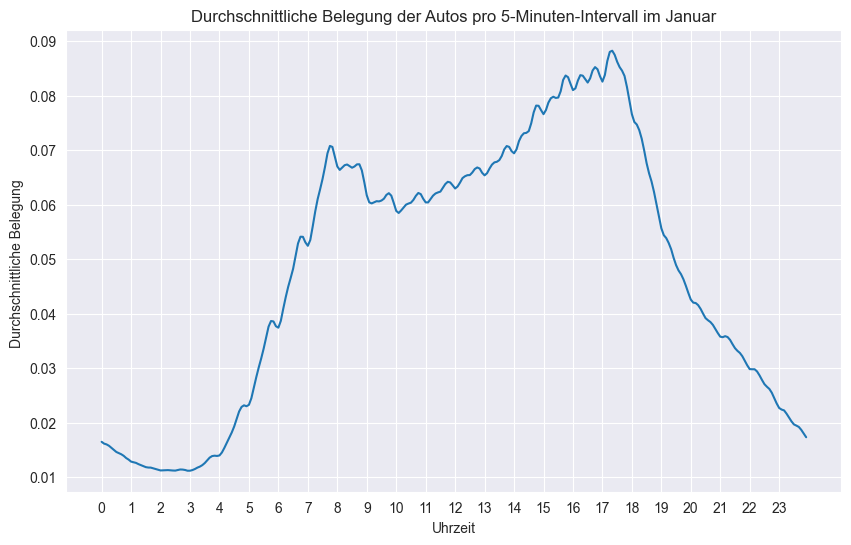

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(avg_per_interval)
plt.title('Durchschnittliche Belegung der Autos pro 5-Minuten-Intervall im Januar')
plt.xlabel('Uhrzeit')
plt.ylabel('Durchschnittliche Belegung ')
plt.xticks(x_ticks, hours)  # Setze die x-Achsen-Beschriftungen auf Stunden
plt.grid(True)
plt.show()


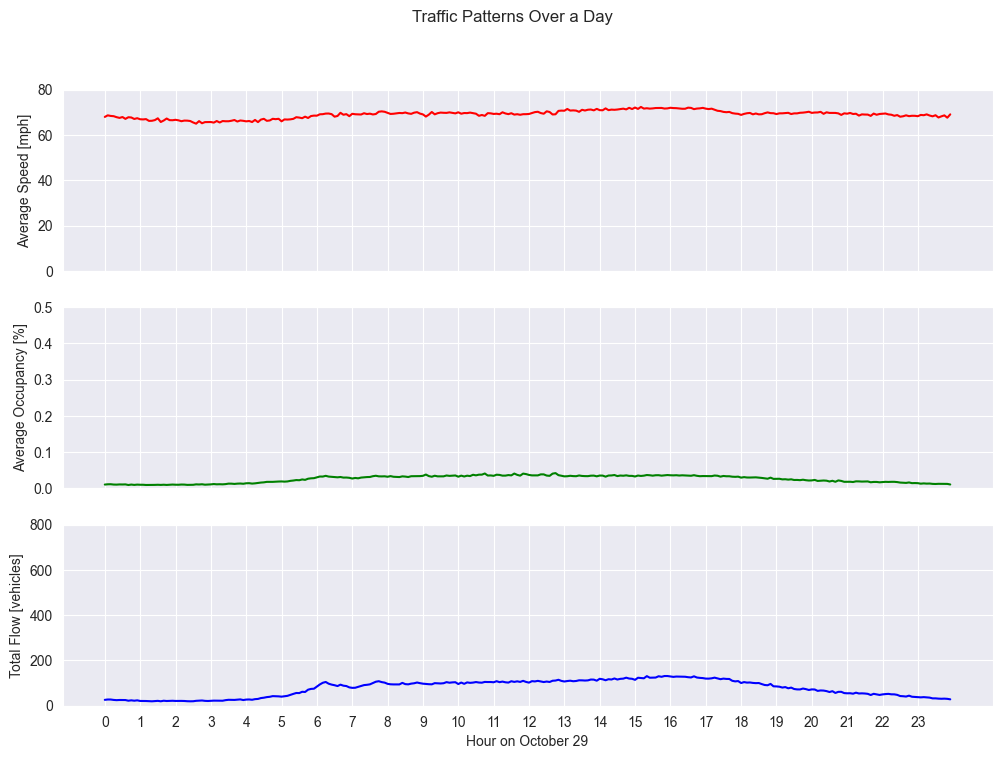

In [16]:
# Extrahiere Matrix 
auto_speed = data_array[:, 10108, 2]     # Average speed in mph
auto_occupancy = data_array[:, 10108, 1] # Occupancy percentage
auto_count = data_array[:, 10108, 0]     # Vehicle count (flow)

intervals_per_day = 288  # 5-minute intervals in a day
num_days = data_array.shape[0] // intervals_per_day

# Reshape die Tage zu separaten Tage
daily_speed = auto_speed.reshape(num_days, intervals_per_day, -1)
daily_occupancy = auto_occupancy.reshape(num_days, intervals_per_day, -1)
daily_count = auto_count.reshape(num_days, intervals_per_day, -1)

# Berechnung des Tagesdurchschnitts für jedes 5-Minuten-Intervall über alle Sensoren hinweg
avg_speed_per_interval = np.nanmean(daily_speed, axis=2)
avg_occupancy_per_interval = np.nanmean(daily_occupancy, axis=2)
avg_count_per_interval = np.nanmean(daily_count, axis=2)

# Berechne den durchschnitt über alle Tage
avg_speed = np.nanmean(avg_speed_per_interval, axis=0)
avg_occupancy = np.nanmean(avg_occupancy_per_interval, axis=0)
avg_count = np.nanmean(avg_count_per_interval, axis=0)

# Generate hourly tick labels
hours = [f'{h}' for h in range(24)]
x_ticks = np.arange(0, intervals_per_day, 12)  # Position every hour

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot average speed
axes[0].plot(avg_speed, color='red')
axes[0].set_ylabel("Average Speed [mph]")
axes[0].set_ylim(0, 80)  # Adjust if needed
axes[0].grid(True)

# Plot average occupancy
axes[1].plot(avg_occupancy, color='green')
axes[1].set_ylabel("Average Occupancy [%]")
axes[1].set_ylim(0, 0.5)  # Adjust if needed
axes[1].grid(True)

# Plot Flow
axes[2].plot(avg_count, color='blue')
axes[2].set_ylabel("Total Flow [vehicles]")
axes[2].set_xlabel("Hour on October 29")
axes[2].set_ylim(0, 800)  # Adjust if needed
axes[2].grid(True)


plt.xticks(x_ticks, hours)
fig.suptitle('Traffic Patterns Over a Day')
plt.show()